In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt

In [2]:
path = os.path.join(os.getenv('DATA'), '2023_prediction_contest.xlsx')

In [3]:
df = pd.read_excel(path)

In [4]:
df.head()

,Whichmodeareyouplayingin,ForecastingExperience,Superforecaster,LessWrong,@1.WillVladimirPutinbePresidentofRussia,@2.WillUkrainecontrolthecityofSevastopol,@3.WillUkrainecontrolthecityofLuhansk,@4.WillUkrainecontrolthecityofZaporizhzhia,@5.WilltherebealastingceasefireintheRussiaUkrainewar,@6.WilltheKerchBridgebedestroyedsuchthatnovehiclecanpassoverit,...,Wouldyouquotwireheadquotifyouhadtheoption,Howmuchdoyoutrustthemainstreammedia,Ifyouanswered1or2mostlydistrustonthequestionabovewhichoftheseeve,OptionalWasthereanyotherspecificarticleoreventthatseriouslyunder,Howgoodasenseofdirectionorientationandnavigationdoyouhave,Howmuchdoflashingorchangingelementsdetractfromyourenjoymentofweb,Howmanybrowsertabsdoyouhaveopenrightnow,Howmanyunreademailsareinyourinboxrightnow,SupposeItoldyouthatyourfirstguessabouthowthedistancebetweenParis,Ifyouaposvetriedpsychotherapyforanyissuehowwelldiditwork
0,Blind Mode (recommended),No,No,No,99.0,1.0,1.0,1.0,99.0,1.0,...,1.0,1.0,"COVID (later support for vaccines, masks, lock...",NaN,1.0,I notice these and they annoy me a little,10 - 50,1651,2000.0,5.0
1,Blind Mode (recommended),No,No,No,99.0,1.0,50.0,50.0,85.0,15.0,...,2.0,1.0,"COVID (later support for vaccines, masks, lock...",all of the above plus a constant blizzard of o...,4.0,I notice them and they annoy me so much that I...,More than 50,0,1850.0,NaN
2,Blind Mode (recommended),No,No,No,99.0,1.0,50.0,33.0,1.0,20.0,...,1.0,4.0,NaN,NaN,2.0,I notice these and they annoy me a little,2-5,1,8000.0,NaN
3,Blind Mode (recommended),No,No,No,99.0,1.0,1.0,1.0,50.0,10.0,...,1.0,1.0,Attempt to link Trump to Russia,Effective cancelling of Simon Bridges,4.0,I notice them and they annoy me quite a bit,10 - 50,2,3000.0,NaN
4,Blind Mode (recommended),No,No,No,99.0,30.0,30.0,75.0,40.0,80.0,...,4.0,4.0,NaN,NaN,4.0,I notice them and they annoy me quite a bit,5 - 10,0,2000.0,NaN


In [5]:
df.isnull().sum()

Whichmodeareyouplayingin                                               0
ForecastingExperience                                                  4
Superforecaster                                                        8
LessWrong                                                              8
@1.WillVladimirPutinbePresidentofRussia                               15
                                                                    ... 
Howmuchdoflashingorchangingelementsdetractfromyourenjoymentofweb    2236
Howmanybrowsertabsdoyouhaveopenrightnow                             2234
Howmanyunreademailsareinyourinboxrightnow                           2254
SupposeItoldyouthatyourfirstguessabouthowthedistancebetweenParis    2273
Ifyouaposvetriedpsychotherapyforanyissuehowwelldiditwork            2918
Length: 225, dtype: int64

There are two different sets. Let's ignore the other group.

In [6]:
pred_columns = df.columns[:54]

In [7]:
pred_columns

Index(['Whichmodeareyouplayingin', 'ForecastingExperience', 'Superforecaster',
       'LessWrong', '@1.WillVladimirPutinbePresidentofRussia',
       '@2.WillUkrainecontrolthecityofSevastopol',
       '@3.WillUkrainecontrolthecityofLuhansk',
       '@4.WillUkrainecontrolthecityofZaporizhzhia',
       '@5.WilltherebealastingceasefireintheRussiaUkrainewar',
       '@6.WilltheKerchBridgebedestroyedsuchthatnovehiclecanpassoverit',
       '@7.WillanissueinvolvinganuclearpowerplantinUkrainerequireevacuat',
       '@8.Willanuclearweaponbedetonatedincludingtestsandaccidents',
       '@9.Willanuclearweaponbeusedinwarienotatestoraccidentandkillatlea',
       '@10.WillChinalaunchafullscaleinvasionofTaiwan',
       '@11.WillanynewcountryjoinNATO',
       '@12.WillAliKhameiniceasetobeSupremeLeaderofIran',
       '@13.WillanyotherwarhavemorecasualtiesthanRussiaUkraine',
       '@14.Willtherebemorethan25millionconfirmedCOVIDcasesinChina',
       '@15.WillpredictionmarketssayJoeBidenisthemostlikelyDemo

In [8]:
pdf = df[pred_columns]

In [9]:
pdf

,Whichmodeareyouplayingin,ForecastingExperience,Superforecaster,LessWrong,@1.WillVladimirPutinbePresidentofRussia,@2.WillUkrainecontrolthecityofSevastopol,@3.WillUkrainecontrolthecityofLuhansk,@4.WillUkrainecontrolthecityofZaporizhzhia,@5.WilltherebealastingceasefireintheRussiaUkrainewar,@6.WilltheKerchBridgebedestroyedsuchthatnovehiclecanpassoverit,...,@41.WillanimagemodelwinScottAlexander’sbetoncompositionalitytoEd,@42.WillCOVIDkillatleast50asmanypeoplein2023asitdidin2022,@43.WillanewversionofCOVIDbesubstantiallyabletoescapeOmicronvacc,@44.WillGoogleMetaAmazonorApplereleaseanARheadset,@45.WillanordinarypersonbeabletotakeaselfdrivingtaxifromOaklandS,@46.WillaculturedmeatproductbeavailableinatleastoneUSstoreorrest,@47.Willasuccessfuldeepfakeattemptcausingrealdamagemakethefrontp,@48.WillWHOdeclareanewGlobalHealthEmergency,@49.WillAIwinaprogrammingcompetition,@50.WillsomeonereleasequotDALLEbutforvideosquot
0,Blind Mode (recommended),No,No,No,99.0,1.0,1.0,1.0,99.0,1.0,...,50.0,1.0,99.0,99.0,1.0,1.0,1.0,1.0,99.0,99.0
1,Blind Mode (recommended),No,No,No,99.0,1.0,50.0,50.0,85.0,15.0,...,98.0,2.0,97.0,50.0,50.0,50.0,4.0,15.0,45.0,55.0
2,Blind Mode (recommended),No,No,No,99.0,1.0,50.0,33.0,1.0,20.0,...,60.0,25.0,25.0,25.0,5.0,1.0,10.0,3.0,5.0,10.0
3,Blind Mode (recommended),No,No,No,99.0,1.0,1.0,1.0,50.0,10.0,...,50.0,99.0,99.0,1.0,1.0,10.0,1.0,90.0,15.0,1.0
4,Blind Mode (recommended),No,No,No,99.0,30.0,30.0,75.0,40.0,80.0,...,90.0,30.0,40.0,60.0,70.0,60.0,70.0,20.0,90.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,Blind Mode (recommended),No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,50.0,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN
3291,Blind Mode (recommended),No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3292,Blind Mode (recommended),No,No,No,NaN,65.0,62.0,65.0,75.0,44.0,...,NaN,41.0,61.0,66.0,45.0,44.0,68.0,47.0,51.0,45.0
3293,Blind Mode (recommended),No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,80.0,NaN,20.0,NaN,NaN,30.0,20.0,70.0


In [10]:
pdf = pdf.sample(100)

In [11]:
# profile = ProfileReport(pdf, title="Pandas Profiling Report")


In [12]:
# profile.to_widgets()

In [13]:
pdf

,Whichmodeareyouplayingin,ForecastingExperience,Superforecaster,LessWrong,@1.WillVladimirPutinbePresidentofRussia,@2.WillUkrainecontrolthecityofSevastopol,@3.WillUkrainecontrolthecityofLuhansk,@4.WillUkrainecontrolthecityofZaporizhzhia,@5.WilltherebealastingceasefireintheRussiaUkrainewar,@6.WilltheKerchBridgebedestroyedsuchthatnovehiclecanpassoverit,...,@41.WillanimagemodelwinScottAlexander’sbetoncompositionalitytoEd,@42.WillCOVIDkillatleast50asmanypeoplein2023asitdidin2022,@43.WillanewversionofCOVIDbesubstantiallyabletoescapeOmicronvacc,@44.WillGoogleMetaAmazonorApplereleaseanARheadset,@45.WillanordinarypersonbeabletotakeaselfdrivingtaxifromOaklandS,@46.WillaculturedmeatproductbeavailableinatleastoneUSstoreorrest,@47.Willasuccessfuldeepfakeattemptcausingrealdamagemakethefrontp,@48.WillWHOdeclareanewGlobalHealthEmergency,@49.WillAIwinaprogrammingcompetition,@50.WillsomeonereleasequotDALLEbutforvideosquot
1391,Blind Mode (recommended),No,No,No,87.0,20.0,45.0,70.0,37.0,10.0,...,67.0,78.0,55.0,95.0,75.0,20.0,30.0,10.0,55.0,25.0
763,Blind Mode (recommended),Yes,No,No,90.0,15.0,25.0,50.0,33.0,75.0,...,75.0,30.0,65.0,65.0,33.0,60.0,60.0,60.0,75.0,75.0
1118,Blind Mode (recommended),Yes,No,No,90.0,1.0,1.0,1.0,40.0,1.0,...,NaN,10.0,20.0,30.0,30.0,50.0,50.0,50.0,20.0,80.0
817,Blind Mode (recommended),No,No,No,90.0,10.0,20.0,90.0,50.0,25.0,...,NaN,50.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2108,Blind Mode (recommended),No,No,No,80.0,30.0,90.0,90.0,10.0,90.0,...,80.0,50.0,40.0,90.0,40.0,60.0,50.0,75.0,20.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,Blind Mode (recommended),No,No,Yes,75.0,10.0,60.0,75.0,40.0,5.0,...,65.0,20.0,30.0,50.0,35.0,50.0,20.0,20.0,10.0,55.0
575,Blind Mode (recommended),No,No,No,95.0,1.0,65.0,65.0,1.0,1.0,...,75.0,50.0,50.0,70.0,1.0,5.0,80.0,10.0,90.0,95.0
1269,Blind Mode (recommended),Yes,No,No,90.0,25.0,25.0,25.0,60.0,NaN,...,NaN,30.0,NaN,40.0,1.0,70.0,2.0,2.0,10.0,99.0
2511,Blind Mode (recommended),No,No,No,75.0,75.0,95.0,95.0,80.0,60.0,...,70.0,10.0,10.0,90.0,5.0,40.0,20.0,50.0,5.0,20.0


In [14]:
pdf.mean(numeric_only=True).astype(int)

@1.WillVladimirPutinbePresidentofRussia                             80
@2.WillUkrainecontrolthecityofSevastopol                            30
@3.WillUkrainecontrolthecityofLuhansk                               43
@4.WillUkrainecontrolthecityofZaporizhzhia                          68
@5.WilltherebealastingceasefireintheRussiaUkrainewar                42
@6.WilltheKerchBridgebedestroyedsuchthatnovehiclecanpassoverit      29
@7.WillanissueinvolvinganuclearpowerplantinUkrainerequireevacuat    22
@8.Willanuclearweaponbedetonatedincludingtestsandaccidents          15
@9.Willanuclearweaponbeusedinwarienotatestoraccidentandkillatlea     5
@10.WillChinalaunchafullscaleinvasionofTaiwan                        9
@11.WillanynewcountryjoinNATO                                       63
@12.WillAliKhameiniceasetobeSupremeLeaderofIran                     33
@13.WillanyotherwarhavemorecasualtiesthanRussiaUkraine              18
@14.Willtherebemorethan25millionconfirmedCOVIDcasesinChina          54
@15.Wi

In [15]:
pdf.median(numeric_only=True).astype(int)

@1.WillVladimirPutinbePresidentofRussia                             85
@2.WillUkrainecontrolthecityofSevastopol                            20
@3.WillUkrainecontrolthecityofLuhansk                               40
@4.WillUkrainecontrolthecityofZaporizhzhia                          75
@5.WilltherebealastingceasefireintheRussiaUkrainewar                40
@6.WilltheKerchBridgebedestroyedsuchthatnovehiclecanpassoverit      25
@7.WillanissueinvolvinganuclearpowerplantinUkrainerequireevacuat    15
@8.Willanuclearweaponbedetonatedincludingtestsandaccidents          10
@9.Willanuclearweaponbeusedinwarienotatestoraccidentandkillatlea     3
@10.WillChinalaunchafullscaleinvasionofTaiwan                        5
@11.WillanynewcountryjoinNATO                                       72
@12.WillAliKhameiniceasetobeSupremeLeaderofIran                     30
@13.WillanyotherwarhavemorecasualtiesthanRussiaUkraine              10
@14.Willtherebemorethan25millionconfirmedCOVIDcasesinChina          60
@15.Wi

In [16]:
pdf.mean(numeric_only=True).sort_values()

@9.Willanuclearweaponbeusedinwarienotatestoraccidentandkillatlea     5.153061
@10.WillChinalaunchafullscaleinvasionofTaiwan                        9.887755
@8.Willanuclearweaponbedetonatedincludingtestsandaccidents          15.881720
@13.WillanyotherwarhavemorecasualtiesthanRussiaUkraine              18.474227
@24.WillamajorUSpoliticalfigurebekilledorwoundedinanassassinatio    18.765957
@16.WillpredictionmarketssayGavinNewsomisthemostlikelyDemocratic    19.223404
@7.WillanissueinvolvinganuclearpowerplantinUkrainerequireevacuat    22.166667
@45.WillanordinarypersonbeabletotakeaselfdrivingtaxifromOaklandS    23.340909
@22.WillJoeBidenhaveapositiveapprovalminusdispprovalrating          24.829787
@26.WilltheUKholdageneralelection                                   28.250000
@20.WilltherebeanychangeinthecompositionoftheSupremeCourt           28.521277
@6.WilltheKerchBridgebedestroyedsuchthatnovehiclecanpassoverit      29.626506
@48.WillWHOdeclareanewGlobalHealthEmergency                     

In [17]:
pdf.std().sort_values(ascending=False)

C:\Users\Julius\AppData\Local\Temp\ipykernel_27804\1184436894.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pdf.std().sort_values(ascending=False)


@14.Willtherebemorethan25millionconfirmedCOVIDcasesinChina          32.219172
@50.WillsomeonereleasequotDALLEbutforvideosquot                     30.640837
@21.WillDonaldTrumpmakeatleastonetweet                              27.230631
@11.WillanynewcountryjoinNATO                                       26.875955
@42.WillCOVIDkillatleast50asmanypeoplein2023asitdidin2022           26.874819
@49.WillAIwinaprogrammingcompetition                                26.650879
@29.WillTwitterapossaveragemonetizabledailyusersbehigherin2023th    26.501728
@28.WillTwitterapossnetincomebehigherin2023thanin2022               26.318523
@2.WillUkrainecontrolthecityofSevastopol                            26.084179
@38.WillanyFAANGorMuskcompanyacceptcryptoasapayment                 26.016109
@40.WillSpaceXapossStarshipreachorbit                               25.637193
@47.Willasuccessfuldeepfakeattemptcausingrealdamagemakethefrontp    25.506583
@3.WillUkrainecontrolthecityofLuhansk                           

In [18]:
putin = '@1.WillVladimirPutinbePresidentofRussia'
sevastopol = '@2.WillUkrainecontrolthecityofSevastopol'

In [19]:
biden = "@15.WillpredictionmarketssayJoeBidenisthemostlikelyDemocraticnom"
newsome = '@16.WillpredictionmarketssayGavinNewsomisthemostlikelyDemocratic'
trump = '@17.WillpredictionmarketssayDonaldTrumpisthemostlikelyRepublican'
desantis = '@18.WillpredictionmarketssayRonDeSantisisthemostlikelyRepublican'



In [20]:
candidates = [biden, newsome, trump, desantis]

<AxesSubplot:ylabel='Frequency'>

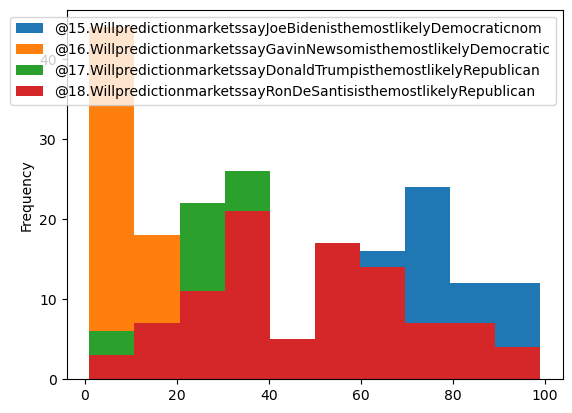

In [21]:
pdf[candidates].plot.hist()

In [22]:
elon_twitter = "@27.WillElonMuskremainownerofTwitter"
twitter_income = '@28.WillTwitterapossnetincomebehigherin2023thanin2022'
twitter_users = '@29.WillTwitterapossaveragemonetizabledailyusersbehigherin2023th'

In [23]:
twitters = [elon_twitter, twitter_income, twitter_users]

<AxesSubplot:ylabel='Frequency'>

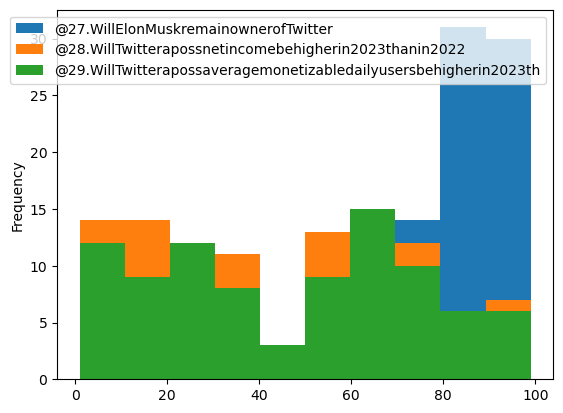

In [24]:
pdf[twitters].plot.hist()

In [25]:
trump_criminal = '@23.WillDonaldTrumpgetindictedoncriminalcharges'

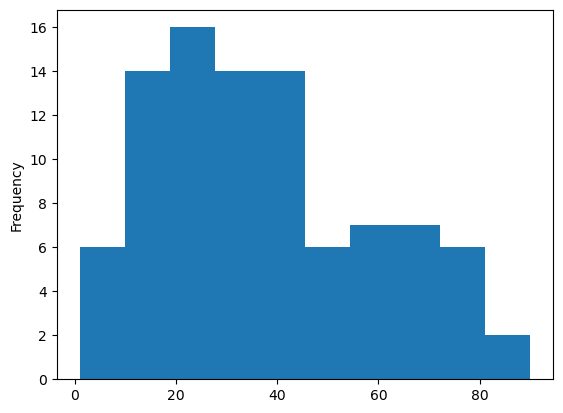

In [26]:
pdf[trump_criminal].plot.hist();

What can't people agree upon?

In [27]:
pdf.std(numeric_only=True).idxmax()

'@14.Willtherebemorethan25millionconfirmedCOVIDcasesinChina'

In [28]:
china_covid = '@14.Willtherebemorethan25millionconfirmedCOVIDcasesinChina'

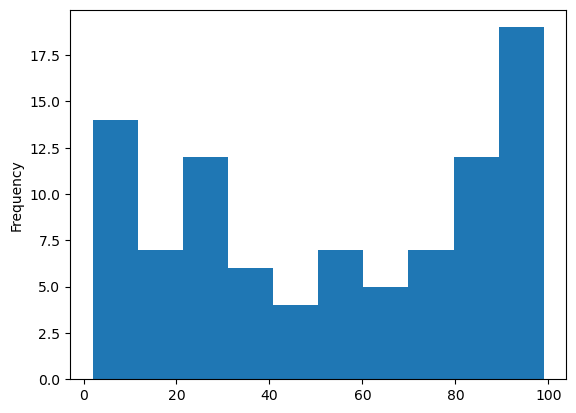

In [29]:
pdf[china_covid].plot.hist();

In [31]:
ai_winner = '@49.WillAIwinaprogrammingcompetition'

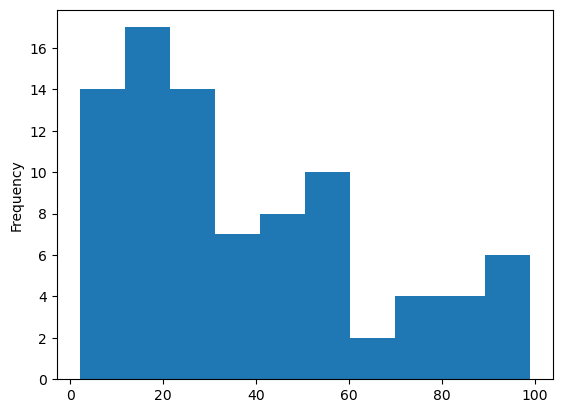

In [32]:
pdf[ai_winner].plot.hist();

Most agreement on

In [33]:
pdf.std(numeric_only=True).idxmin()

'@9.Willanuclearweaponbeusedinwarienotatestoraccidentandkillatlea'

In [34]:
nuke_in_war = '@9.Willanuclearweaponbeusedinwarienotatestoraccidentandkillatlea'

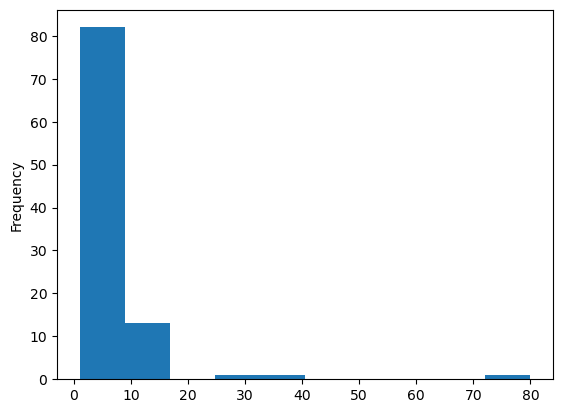

In [35]:
pdf[nuke_in_war].plot.hist();